In [1]:
import os;
for dirpath , dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} dir and {len(filenames)} images in '{dirpath}'.")

There are 2 dir and 0 images in 'pizza_steak'.
There are 2 dir and 0 images in 'pizza_steak\test'.
There are 0 dir and 250 images in 'pizza_steak\test\pizza'.
There are 0 dir and 250 images in 'pizza_steak\test\steak'.
There are 2 dir and 0 images in 'pizza_steak\train'.
There are 0 dir and 750 images in 'pizza_steak\train\pizza'.
There are 0 dir and 750 images in 'pizza_steak\train\steak'.


In [2]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [4]:
class_names

array(['pizza', 'steak'], dtype='<U5')

image shape: (512, 512, 3)


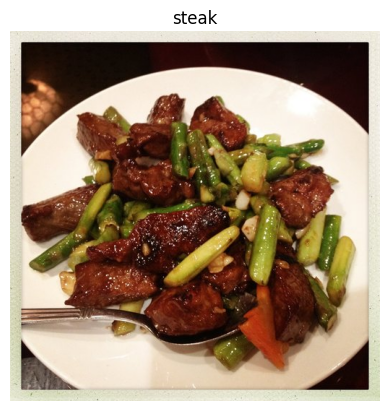

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
    target_folder = target_dir + "/" + target_class
    random_img = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + '/' + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape: {img.shape}")
    return img

img = view_random_image(target_dir = "pizza_steak/train",target_class = "steak")

In [41]:
import tensorflow as tf
tf.constant(img),img.shape

(<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[242, 239, 224],
         [237, 234, 219],
         [233, 230, 215],
         ...,
         [239, 235, 224],
         [241, 237, 228],
         [245, 241, 232]],
 
        [[220, 217, 202],
         [224, 221, 206],
         [228, 225, 210],
         ...,
         [239, 235, 224],
         [239, 235, 226],
         [241, 237, 228]],
 
        [[216, 212, 200],
         [223, 219, 207],
         [231, 228, 213],
         ...,
         [243, 239, 228],
         [244, 240, 231],
         [245, 241, 232]],
 
        ...,
 
        [[238, 239, 221],
         [237, 238, 220],
         [235, 236, 218],
         ...,
         [217, 224, 193],
         [222, 229, 198],
         [223, 230, 199]],
 
        [[235, 236, 218],
         [234, 235, 217],
         [233, 234, 216],
         ...,
         [219, 225, 197],
         [221, 227, 199],
         [219, 225, 197]],
 
        [[236, 237, 219],
         [234, 235, 217],
         [233,

In [42]:
img/255.

array([[[0.94901961, 0.9372549 , 0.87843137],
        [0.92941176, 0.91764706, 0.85882353],
        [0.91372549, 0.90196078, 0.84313725],
        ...,
        [0.9372549 , 0.92156863, 0.87843137],
        [0.94509804, 0.92941176, 0.89411765],
        [0.96078431, 0.94509804, 0.90980392]],

       [[0.8627451 , 0.85098039, 0.79215686],
        [0.87843137, 0.86666667, 0.80784314],
        [0.89411765, 0.88235294, 0.82352941],
        ...,
        [0.9372549 , 0.92156863, 0.87843137],
        [0.9372549 , 0.92156863, 0.88627451],
        [0.94509804, 0.92941176, 0.89411765]],

       [[0.84705882, 0.83137255, 0.78431373],
        [0.8745098 , 0.85882353, 0.81176471],
        [0.90588235, 0.89411765, 0.83529412],
        ...,
        [0.95294118, 0.9372549 , 0.89411765],
        [0.95686275, 0.94117647, 0.90588235],
        [0.96078431, 0.94509804, 0.90980392]],

       ...,

       [[0.93333333, 0.9372549 , 0.86666667],
        [0.92941176, 0.93333333, 0.8627451 ],
        [0.92156863, 0

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
tf.random.set_seed(42)
img_size = 224
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255) 

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,batch_size = 32,target_size = (img_size,img_size),class_mode = "binary",seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,batch_size = 32,target_size = (img_size,img_size),class_mode = "binary",seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [86]:

tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (img_size,img_size,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


In [88]:
model.compile(loss = "binary_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics = ["accuracy"])
history_1 = model.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = valid_data,validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 3s 65ms/step - loss: 0.3973 - accuracy: 0.8233 - val_loss: 0.3605 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 3s 62ms/step - loss: 0.3642 - accuracy: 0.8440 - val_loss: 0.2974 - val_accuracy: 0.8780
Epoch 3/5
47/47 [==============================] - 3s 62ms/step - loss: 0.3177 - accuracy: 0.8680 - val_loss: 0.2958 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 3s 61ms/step - loss: 0.3095 - accuracy: 0.8760 - val_loss: 0.3250 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 3s 60ms/step - loss: 0.2304 - accuracy: 0.9140 - val_loss: 0.3204 - val_accuracy: 0.8520


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    